<div>
<img src = "netflix-logo.png" width = "500"/>
</div>

# Introduction
**Netflix is not a name unfamiliar to most people. Here are some key statistics why I am enthusaistic about analyzing Netflix.**
- 04 million Netflix streaming subscribers as of Q4 2020 *(Netflix)*
- Netflix users by region in Q4 2020: 74 million US & Canada; 67 million EMEA; 38 million Latin America; 25 million Asia Pacific *(Netflix)*
- Netflix accounts for 34% of US streaming/8.5% of overall viewing *(Nielsen)*
- Netflix US library contains 3,600 movies and 1,800 shows as of February 2021 *(JustWatch)*
- Extraction most viewed Netflix Originals film as of January 2021, with 99 million views in first month *(Netflix via  What’s on Netflix)*
- The Office most streamed Netflix (and overall) series in the US over 2020, with a total of 57.1 billion minutes *(Nielsen)*
- Total Netflix 2020 revenue came to 25 billion, up from 20 billion in 2019 *(Netflix)*

In [10]:
#Importing data and required libraries
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
os.chdir("/Users/ayonikabose/Documents/GitHub/analysis_of_netflix_titles")
data = pd.read_csv("netflix_titles.csv")
df = pd.DataFrame(data, index = None)
data.sample(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2703,s2704,Movie,Hera Pheri,Prakash Mehra,"Amitabh Bachchan, Vinod Khanna, Saira Banu, Su...",India,"December 31, 2019",1976,TV-14,156 min,"Action & Adventure, Comedies, Dramas",The bond between two crooks and best friends i...
4082,s4083,Movie,Mighty Express: A Mighty Christmas,Clint Butler,"Jay Hatton, Zoe Hatz, Meesha Contreras, Dylan ...",Canada,"December 5, 2020",2020,TV-Y,26 min,Children & Family Movies,The Mighty Express welcomes a new train and sp...
4661,s4662,Movie,Only Mine,Michael Civille,"Amber Midthunder, Brett Zimmerman, Chris Brown...",United States,"January 15, 2019",2018,TV-14,88 min,Thrillers,After dating a charming cop who turns into an ...
4660,s4661,Movie,Only God Forgives,Nicolas Winding Refn,"Ryan Gosling, Kristin Scott Thomas, Vithaya Pa...","Denmark, France, United States, Sweden","May 15, 2018",2013,R,90 min,"Cult Movies, Independent Movies, Thrillers",When a cop kills the brother of an expat Ameri...
7336,s7337,Movie,Under the Shadow,Babak Anvari,"Narges Rashidi, Avin Manshadi, Bobby Naderi, R...","United Kingdom, Jordan, Qatar, Iran","January 7, 2017",2016,PG-13,84 min,"Horror Movies, International Movies, Thrillers","During the Iran-Iraq conflict, a Tehran woman ..."


To get an idea, here are 5 random rows from the data! Can't wait to gain some insights *muscle emoji here please!*

In [12]:
rows = len(df.axes[0])
cols = len(df.axes[1])

print("There are " + str(rows) + " rows and " + str(cols) + " columns in the data")

There are 7787 rows and 12 columns in the data


In [13]:
#Let's clean some of the data! 
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [54]:
#Using this code helps us remove all the NA values that was present in the data. We dropped almost 3000 rows phew! 
data = df.dropna()
rows = len(data.axes[0])
cols = len(data.axes[1])
print("There are now " + str(rows) + " rows and " + str(cols) + " columns in the data!")


There are now 4808 rows and 12 columns in the data!


/Users/ayonikabose/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ayonikabose/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ayonikabose/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

Text(0, 0.5, 'Number Of Releases')

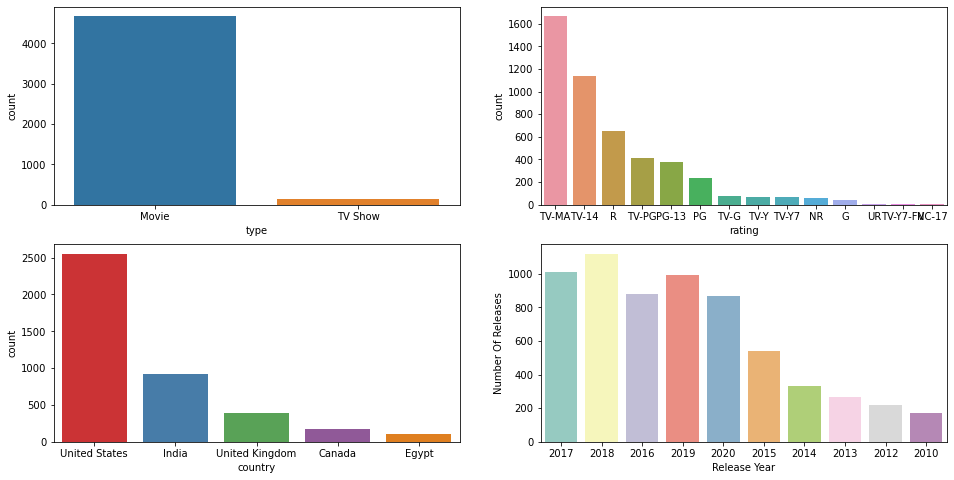

In [55]:
f, ax = plt.subplots(2,2,figsize=(16,8))
vis1 = sns.countplot(data["type"], ax= ax[0][0])
vis2 = sns.countplot(data["rating"], ax=ax[0][1], order=data['rating'].value_counts().index[0:15])
vis3 = sns.countplot(df['country'],ax=ax[1][0],palette = 'Set1', order=data['country'].value_counts().index[0:5])
plt.xlabel('Country')
plt.ylabel('Number Of Releases')
vis4= sns.countplot(df['release_year'], ax = ax[1][1] ,palette = 'Set3', order = data['release_year'].value_counts().index[0:10])
plt.xlabel('Release Year')
plt.ylabel('Number Of Releases')


#### Based on these data visualizations we can find out some *fun stuff*
- **Movies are wayy more popular** than TV Shows 
- **TV for Mature Audiences** seems to be the most popular from the releases, interesting...
- USA, India, UK, Canada and Egypt seem to be the **most popular countries** for releases, GO BOLLYWOOD! 
- **2017 was a very popular year** for producers, but what's super interesting is that despite the Global Pandemic in 2020, it still managed to come 5th in most releases, so that's amazing! 